# 🎬 Final Project Notebook

### **Team Name:**  
> *JigglySeal Data Analysis*

### **Project Title:**  
> Scripted Shadows An analysis of the key creative forces in film and the hidden patterns among cast and genre choices.

### **Dataset:**  
`imdbData.csv` - A dataset of 5,000 top IMDb-rated films, including metadata such as title, release year, rating, vote count, runtime, genres, director, and writer info.


### 🧠 Research Questions

**Main Question:**  
- What writers and directors are most likely to appear on the IMDb Top 5000 list?

**Related Questions:**  
1. Which directors tend to get the best average rating?
2. what is the most uncommon genre?


In [1]:
import pandas as pd
import re
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE


# Load the cleaned data
df = pd.read_csv("imdbData.csv")
df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'imdbData.csv'

In [ ]:
# Overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           5000 non-null   object 
 1   primaryTitle     5000 non-null   object 
 2   startYear        5000 non-null   int64  
 3   rank             5000 non-null   int64  
 4   averageRating    5000 non-null   float64
 5   numVotes         5000 non-null   int64  
 6   runtimeMinutes   5000 non-null   int64  
 7   directors        5000 non-null   object 
 8   writers          4974 non-null   object 
 9   genres           5000 non-null   object 
 10  IMDbLink         5000 non-null   object 
 11  Title_IMDb_Link  5000 non-null   object 
dtypes: float64(1), int64(4), object(7)
memory usage: 468.9+ KB


In [ ]:
df.describe(include='all')

,tconst,primaryTitle,startYear,rank,averageRating,numVotes,runtimeMinutes,directors,writers,genres,IMDbLink,Title_IMDb_Link
count,5000,5000,5000.000000,5000.000000,5000.00000,5.000000e+03,5000.000000,5000,4974,5000,5000,5000
unique,5000,4909,NaN,NaN,NaN,NaN,NaN,2279,4373,360,5000,5000
top,tt5177088,Les Misérables,NaN,NaN,NaN,NaN,NaN,Woody Allen,Woody Allen,"Comedy, Drama, Romance","<a href=""https://www.imdb.com/title/tt5177088""...","<a href=""https://www.imdb.com/title/tt5177088""..."
freq,1,3,NaN,NaN,NaN,NaN,NaN,40,33,229,1,1
mean,NaN,NaN,2002.027200,2500.500000,7.13748,1.631401e+05,114.555400,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,18.263854,1443.520003,0.59682,2.405592e+05,23.216182,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1915.000000,1.000000,5.90000,2.500800e+04,25.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,1994.000000,1250.750000,6.70000,4.009625e+04,99.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2007.000000,2500.500000,7.10000,7.445850e+04,111.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2015.000000,3750.250000,7.60000,1.782750e+05,126.000000,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.isna().sum()
df.duplicated().sum()

np.int64(0)

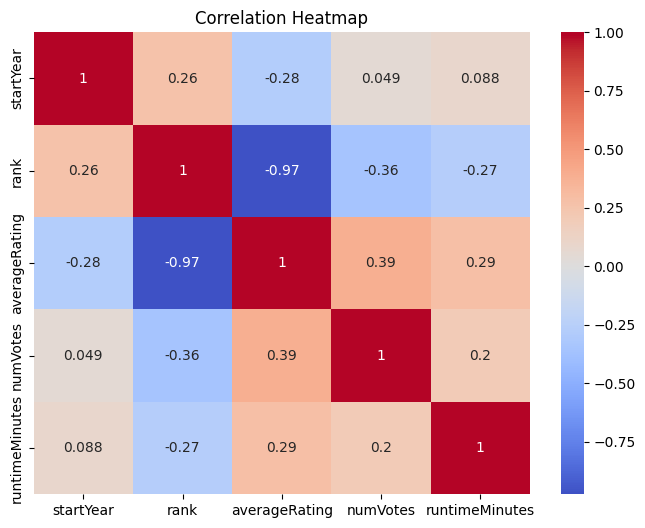

In [ ]:
corr = df.corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

##  Data Description

- **Rows:** 5,000 movies  
- **Columns:** 12 attributes including title, year, rating, votes, runtime, genres, director, and writer  
- **Time Span:** 1915 to 2025  
- **Rating Range:** 5.9 to 9.3  
- **Votes Range:** 25,008 to 3,031,615  
- **Runtime:** 25 to 374 minutes  
- **Genres:** Most common = `Comedy, Drama, Romance`

---

##  Missing Data & Outliers

- `writers`:  26 missing entries still present  
- No duplicate rows  
- **Potential outliers:**
  - 4 films have a runtime longer than 300 minutes  
  - 1 film has a rating below 6.0



starting off by setting up kmeans and the scaler

In [ ]:
kmeandf = df[['startYear', 'averageRating', 'numVotes', 'runtimeMinutes']]

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(kmeandf)

run kmeans and put the results in a list to be plotted

In [ ]:
inertia = []
k_range = range(2, 16)  # Testing k from 2 to 16

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=101)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

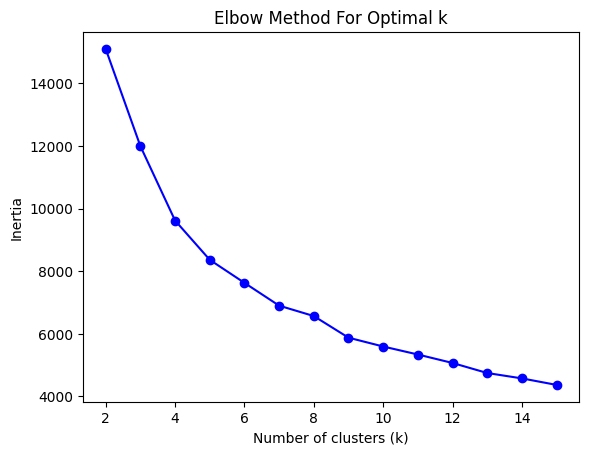

In [ ]:
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

make silhoutte scores as well and plot them similarly

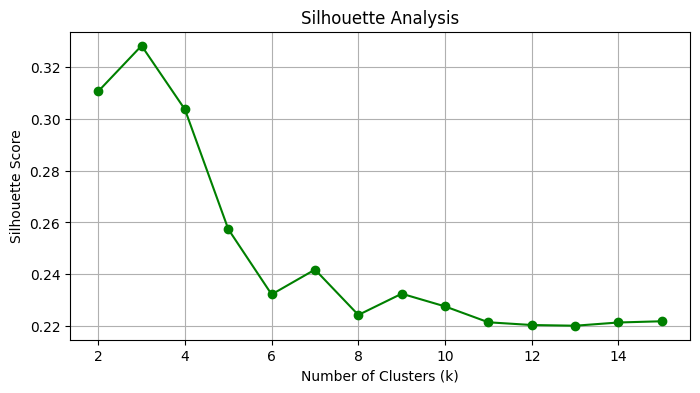

In [ ]:
silhouette_scores = []

# Loop through k values from 2 to 16
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, random_state=101)
    labels = kmeans.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, labels)
    silhouette_scores.append(score)

# Plot Silhouette Scores
plt.figure(figsize=(8, 4))
plt.plot(range(2, 16), silhouette_scores, marker='o', color='green')
plt.title('Silhouette Analysis')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

reduce dimensions and plot final analysis

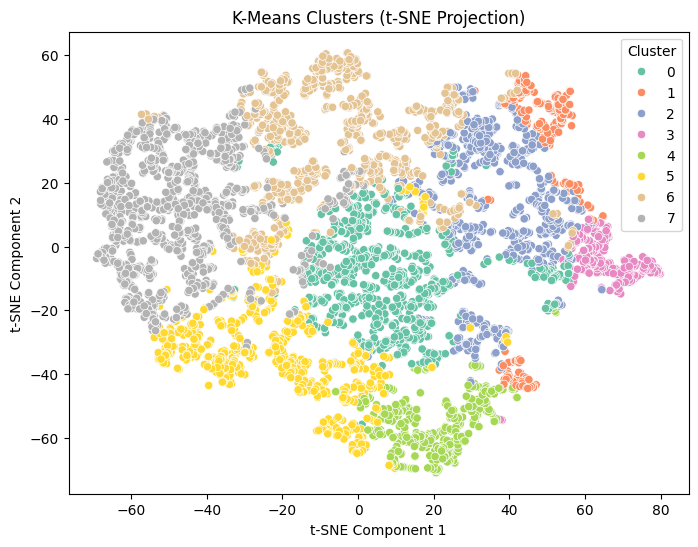

In [ ]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_results = tsne.fit_transform(scaled_features)

# Plot the t-SNE results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=y_kmeans, palette='Set2')
plt.title("K-Means Clusters (t-SNE Projection)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title='Cluster')
plt.show()

In [ ]:
df_clustered = df.copy()
df_clustered['cluster'] = y_kmeans


In [ ]:
cluster_means = df_clustered.groupby('cluster').mean(numeric_only=True)
print(cluster_means)

           startYear         rank  averageRating      numVotes  runtimeMinutes
cluster                                                                       
0        2007.667064  1679.442721       7.430668  1.445606e+05       98.848449
1        2001.042194  1196.126582       7.719831  1.269868e+05      175.552743
2        2007.525622  1151.814056       7.636164  1.965302e+05      129.597365
3        2004.062222   444.582222       8.056889  1.020217e+06      131.560000
4        1958.212658  1054.162025       7.783038  9.610493e+04      106.518987
5        1986.511765  3132.400000       6.855882  7.478247e+04      105.776471
6        2013.015169  3389.682614       6.793932  1.425610e+05      125.924154
7        2010.999078  4123.079263       6.492074  8.266862e+04       99.815668


## Linear Regression

In [ ]:
features = ['numVotes', 'runtimeMinutes', 'startYear']
target = 'averageRating'
df_clean = df[features + [target]].dropna()

# Extract X and y
X = df_clean[features].values
y = df_clean[target].values.reshape(-1, 1)

# Normalize features
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_norm = (X - X_mean) / X_std

In [ ]:
# Fit the regression model
model = LinearRegression()
model.fit(X_norm, y)

# Predict
y_pred = model.predict(X_norm)

In [ ]:
# sqrt of mse to get rmse and print
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"RMSE: {rmse:.4f}")

# calculate coeffecients and intercepts with scikit to make it easier
print("Intercept:", model.intercept_)
#prints out coeffeciencts for each value we are trying to predict off of
print("Coefficients:", model.coef_)


RMSE: 0.5016
Intercept: [7.13748]
Coefficients: [[ 0.21088075  0.14529577 -0.18771062]]


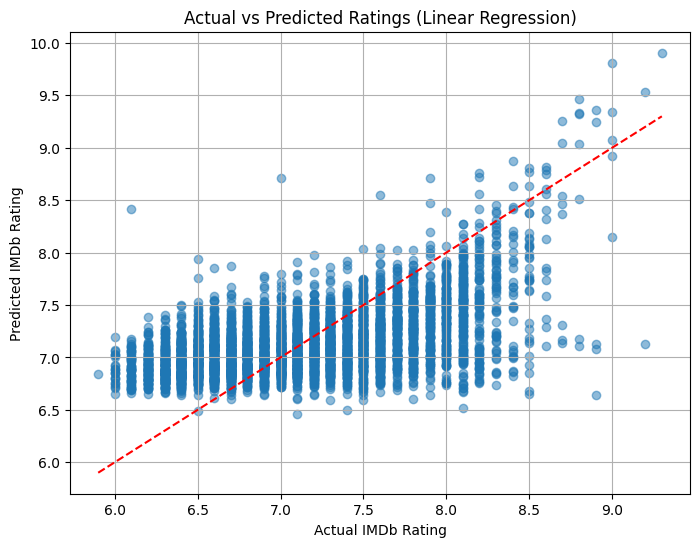

In [ ]:
# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual IMDb Rating')
plt.ylabel('Predicted IMDb Rating')
plt.title('Actual vs Predicted Ratings (Linear Regression)')
plt.grid(True)
plt.show()

Our model doesn't do the worst job with most of the points being within .5 of their predicted rating which isn't that bad on a 10 point scale but it is more practically a 6-10 scale which is much worse I think that other features may be better indicators for ratings, however we might not be able to plot them at least with these methods because they are not numerical, also a non linear line may make for a better fit as we can see it is almost horizontal from 6-7.5 in actual imdb rating and then goes up from there

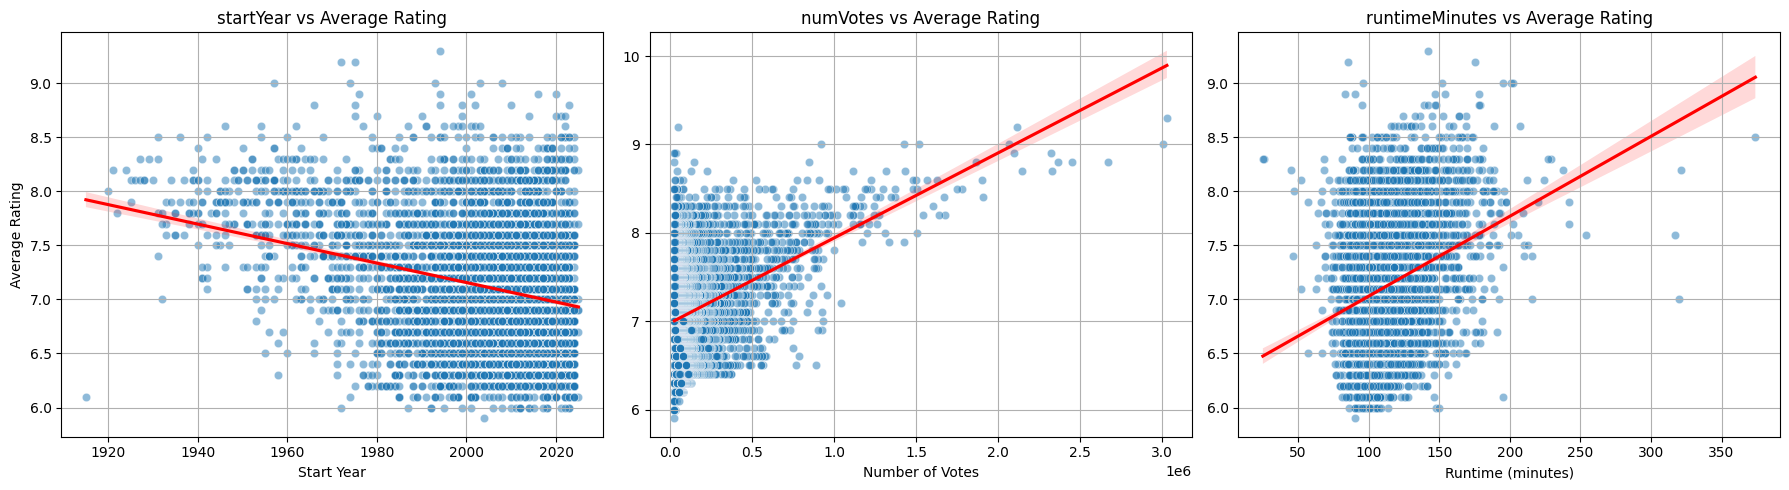

In [ ]:
# Set up 3 side-by-side plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. startYear vs averageRating
sns.scatterplot(x='startYear', y='averageRating', data=df, alpha=0.5, ax=axes[0])
sns.regplot(x='startYear', y='averageRating', data=df, scatter=False, color='red', ax=axes[0])
axes[0].set_title('startYear vs Average Rating')
axes[0].set_xlabel('Start Year')
axes[0].set_ylabel('Average Rating')
axes[0].grid(True)

# 2. numVotes vs averageRating
sns.scatterplot(x='numVotes', y='averageRating', data=df, alpha=0.5, ax=axes[1])
sns.regplot(x='numVotes', y='averageRating', data=df, scatter=False, color='red', ax=axes[1])
axes[1].set_title('numVotes vs Average Rating')
axes[1].set_xlabel('Number of Votes')
axes[1].set_ylabel('')
axes[1].grid(True)

# 3. runtimeMinutes vs averageRating
sns.scatterplot(x='runtimeMinutes', y='averageRating', data=df, alpha=0.5, ax=axes[2])
sns.regplot(x='runtimeMinutes', y='averageRating', data=df, scatter=False, color='red', ax=axes[2])
axes[2].set_title('runtimeMinutes vs Average Rating')
axes[2].set_xlabel('Runtime (minutes)')
axes[2].set_ylabel('')
axes[2].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
corr_start = df['startYear'].corr(df['averageRating'])
corr_votes = df['numVotes'].corr(df['averageRating'])
corr_runtime = df['runtimeMinutes'].corr(df['averageRating'])

print(f"Pearson Correlation (startYear vs averageRating): {corr_start:.3f}")
print(f"Pearson Correlation (numVotes vs averageRating): {corr_votes:.3f}")
print(f"Pearson Correlation (runtimeMinutes vs averageRating): {corr_runtime:.3f}")

Pearson Correlation (startYear vs averageRating): -0.276
Pearson Correlation (numVotes vs averageRating): 0.387
Pearson Correlation (runtimeMinutes vs averageRating): 0.287


As we can see by the correlations for each feature to averageRating, there is some relationship between the statistics however none of them is a particularly strong linear relationship with numVotes having the strongest one and going down hill from there.

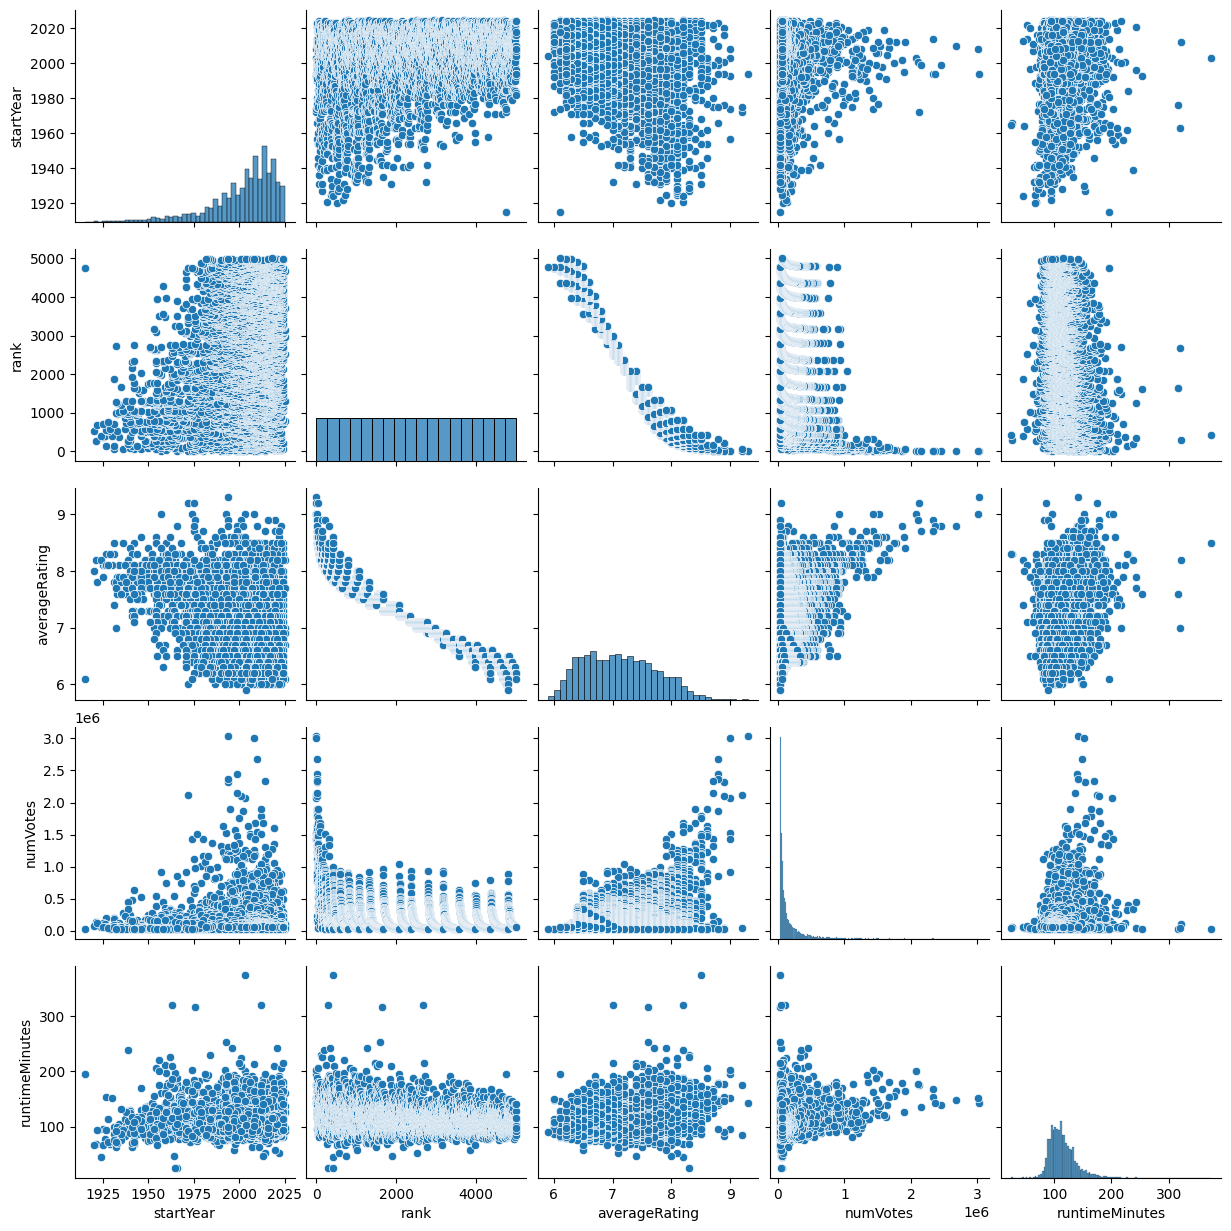

In [ ]:
sns.pairplot(df)

In [ ]:
correlation = df['startYear'].corr(df['averageRating'])
print(f"Pearson Correlation (startYear vs averageRating): {correlation:.3f}")

Pearson Correlation (startYear vs averageRating): -0.276


I wanted to find out which directors had the highest average ratings

In [ ]:
df_q1 = df[df['numVotes'] >= 100]

# Handle multiple directors by splitting on comma
df_q1['directors'] = df_q1['directors'].astype(str)
df_exploded = df_q1.assign(directors=df_q1['directors'].str.split(',')).explode('directors')

# Group by director and calculate average rating and number of movies
director_stats = df_exploded.groupby('directors').agg(
    avg_rating=('averageRating', 'mean'),
    num_movies=('primaryTitle', 'count')
).reset_index()

# Sort directors by average rating descending
top_directors = director_stats.sort_values(by='avg_rating', ascending=False)

# Display top 10 directors
top_directors.head(10)

,directors,avg_rating,num_movies
965,Ertem Egilmez,9.0,2
478,Amitabh Reza Chowdhury,8.9,1
1494,Kartal Tibet,8.9,1
435,Alastair Fothergill,8.9,1
210,Keith Scholey,8.9,1
198,Jonathan Hughes,8.9,1
2457,Vidhu Vinod Chopra,8.8,1
2327,Sudha Kongara,8.7,1
1533,Kiranraj K,8.7,1
1186,Irvin Kershner,8.7,1


I did not consider that 2 movies would be the highest on this list so I also decided to filter for directors who directed at least 3 movies

In [ ]:
director_stats = director_stats[director_stats['num_movies'] >= 3]

top_directors = director_stats.sort_values(by='avg_rating', ascending=False)

top_directors.head(10)

,directors,avg_rating,num_movies
691,Charles Chaplin,8.300000,6
2231,Sergio Leone,8.216667,6
1022,Fritz Lang,8.166667,3
745,Christopher Nolan,8.166667,12
426,Akira Kurosawa,8.141667,12
1948,Pete Docter,8.125000,4
1002,Frank Capra,8.100000,5
230,Lee Unkrich,8.066667,3
1185,Ingmar Bergman,8.022222,9
608,Billy Wilder,8.020000,10


In [ ]:
df_q2 = df.dropna(subset=['genres'])

# Step 4: Handle multiple genres (if multiple genres are comma-separated)
df_q2['genres'] = df_q2['genres'].astype(str)

# Step 5: Split the genres by comma (',') and explode into separate rows
df_q2_exploded = df_q2.assign(genres=df_q2['genres'].str.split(',')).explode('genres')

# Step 6: Strip any leading/trailing spaces from genre names
df_q2_exploded['genres'] = df_q2_exploded['genres'].str.strip()

# Step 7: Count the frequency of each genre
genre_counts = df_q2_exploded['genres'].value_counts()

# Step 8: Get the 5 least common genres
least_common_genres = genre_counts.nsmallest(5)

# Step 9: Display the result
print("The 5 least common genres are:")
print(least_common_genres)

The 5 least common genres are:
genres
News            2
Film-Noir      27
Western        58
Musical        65
Documentary    77
Name: count, dtype: int64


In [ ]:
# Step 3: Drop rows with missing genre data
df_q3 = df.dropna(subset=['genres'])

# Step 4: Handle multiple genres (if multiple genres are comma-separated)
df_q3['genres'] = df_q3['genres'].astype(str)

# Step 5: Split the genres by comma (',') and explode into separate rows
df_q3_exploded = df_q3.assign(genres=df_q3['genres'].str.split(',')).explode('genres')

# Step 6: Strip any leading/trailing spaces from genre names
df_q3_exploded['genres'] = df_q3_exploded['genres'].str.strip()

# Step 7: Count the frequency of each genre
genre_counts = df_q3_exploded['genres'].value_counts()

# Step 8: Get the 5 most common genres
most_common_genres = genre_counts.nlargest(5)

# Step 9: Display the result
print("The 5 most common genres are:")
print(most_common_genres)

The 5 most common genres are:
genres
Drama        3136
Comedy       1640
Action       1129
Crime        1112
Adventure     917
Name: count, dtype: int64
